<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/12_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

names = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP','Target']
features = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
target = 'Target'


DataF = pd.read_csv('dataAlter.csv')
df = pd.DataFrame(data=DataF, columns=names)
df['target'] = DataF['Target']
df.head()

# Separate X and y data
X = df.drop('target', axis=1)
y = df.target
print("Total samples: {}".format(X.shape[0]))


Total samples: 4424


In [5]:
X = df.drop(['Target'], axis=1)
print(X.shape)

(4424, 36)


In [6]:
# Separating out the target
y = df.Target
print(y.shape)

(4424,)


In [7]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [8]:
def minkowski_distance(a, b, p=1):
    # Store the number of dimensions
    dim = len(a)
    # Set initial distance to 0
    distance = 0

    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p

    distance = distance**(1/p)
    return distance

In [9]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)

        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'],
                                index=y_train.index)

        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]

        # Append prediction to output list
        y_hat_test.append(prediction)

    return y_hat_test

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
 print("Total samples: {}".format(X.shape[0]))

Total samples: 4424


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("Total train samples: {}".format(X_train.shape[0]))
print("Total test  samples: {}".format(X_test.shape[0]))

Total train samples: 3318
Total test  samples: 1106


In [42]:
  # Scale the X data using Z-score
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

In [43]:
# STEP 1 - TESTS USING knn classifier write from scratch
    # Make predictions on test dataset using knn classifier
y_pred = knn_predict(X_train, X_test, y_train, y_test, k=5, p=2)

In [38]:
# Get test accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred, average='macro')
print("Acurracy K-NN from scratch: {:.2f}%".format(accuracy))
print("F1 Score K-NN from scratch: {:.2f}%".format(f1))

Acurracy K-NN from scratch: 69.44%
F1 Score K-NN from scratch: 0.60%


Confusion matrix, without normalization
[[219  44  77]
 [ 38  51 112]
 [ 25  42 498]]
Normalized confusion matrix
[[0.64411765 0.12941176 0.22647059]
 [0.18905473 0.25373134 0.55721393]
 [0.04424779 0.07433628 0.88141593]]


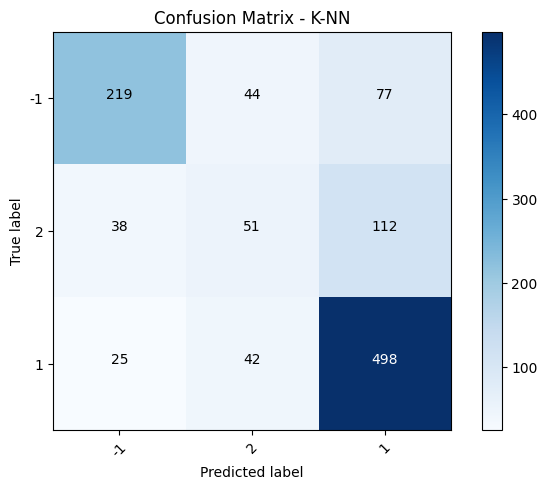

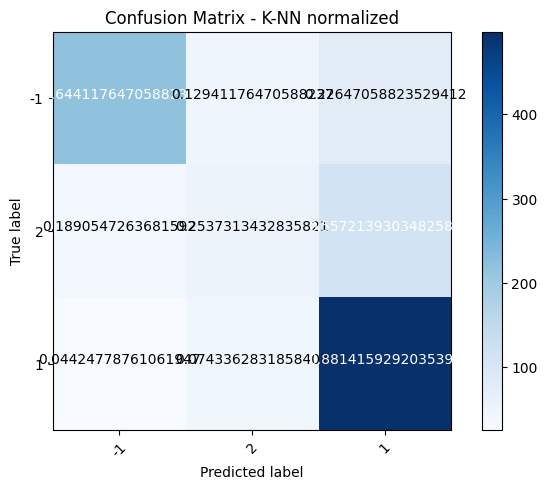

In [37]:
   # Get test confusion matrix
cm = confusion_matrix(y_test, y_pred)
target_names = df['Target'].unique()  # Ajuste se os nomes das classes forem diferentes
plot_confusion_matrix(cm, target_names, False, "Confusion Matrix - K-NN")
plot_confusion_matrix(cm, target_names, True, "Confusion Matrix - K-NN normalized")

In [39]:
 # STEP 2 - TESTS USING knn classifier from sk-learn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_hat_test = knn.predict(X_test)

In [40]:
     # Get test accuracy score
accuracy = accuracy_score(y_test, y_hat_test)*100
f1 = f1_score(y_test, y_hat_test,average='macro')
print("Acurracy K-NN from sk-learn: {:.2f}%".format(accuracy))
print("F1 Score K-NN from sk-learn: {:.2f}%".format(f1))

Acurracy K-NN from sk-learn: 69.35%
F1 Score K-NN from sk-learn: 0.60%


Confusion matrix, without normalization
[[229  44  67]
 [ 45  52 104]
 [ 36  43 486]]
Normalized confusion matrix
[[0.67352941 0.12941176 0.19705882]
 [0.2238806  0.25870647 0.51741294]
 [0.06371681 0.07610619 0.86017699]]


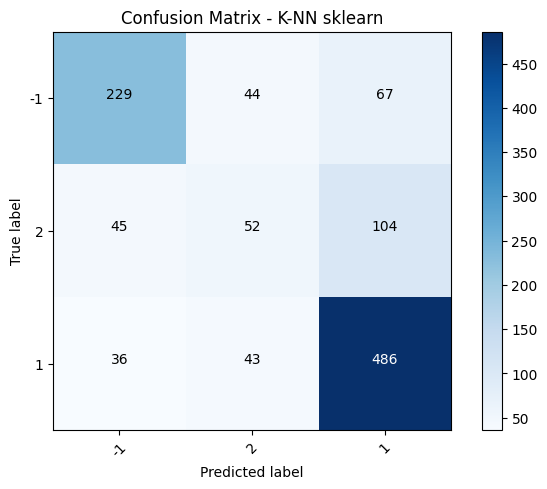

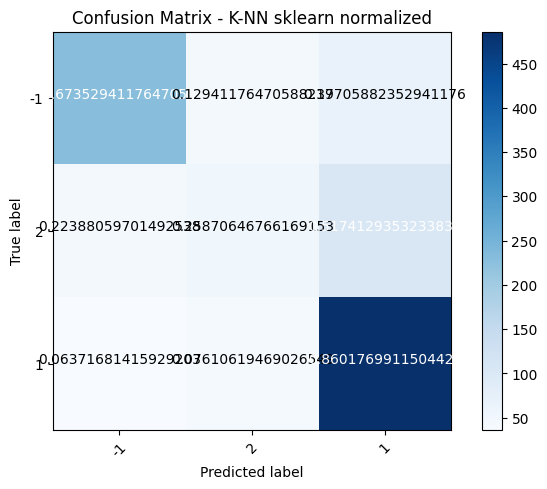

In [41]:
    # Get test confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
target_names = df['Target'].unique()  # Ajuste se os nomes das classes forem diferentes
plot_confusion_matrix(cm, target_names, False, "Confusion Matrix - K-NN sklearn")
plot_confusion_matrix(cm, target_names, True, "Confusion Matrix - K-NN sklearn normalized" )
plt.show()
